In [1]:
import pandas as pd

In [2]:
cd C:\\Users\\arshsuri\\Desktop\\PYTHON\\COVID

C:\Users\arshsuri\Desktop\PYTHON\COVID


In [3]:

df = pd.read_csv('covid-data.csv', index_col='Date', parse_dates=['Date'])
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
df.head(10)

,Germany,Spain,Italy,India,China,United States
Date,,,,,,
2019-12-31,0,0.0,0,0.0,27,0
2020-01-01,0,0.0,0,0.0,27,0
2020-01-02,0,0.0,0,0.0,27,0
2020-01-03,0,0.0,0,0.0,44,0
2020-01-04,0,0.0,0,0.0,44,0
2020-01-05,0,0.0,0,0.0,59,0
2020-01-06,0,0.0,0,0.0,59,0
2020-01-07,0,0.0,0,0.0,59,0
2020-01-08,0,0.0,0,0.0,59,0


In [4]:
s = df.loc['3/16/2020']
s

Germany           4838.0
Spain            11491.0
Italy            23980.0
India              125.0
China            81020.0
United States     3774.0
Name: 2020-03-16 00:00:00, dtype: float64

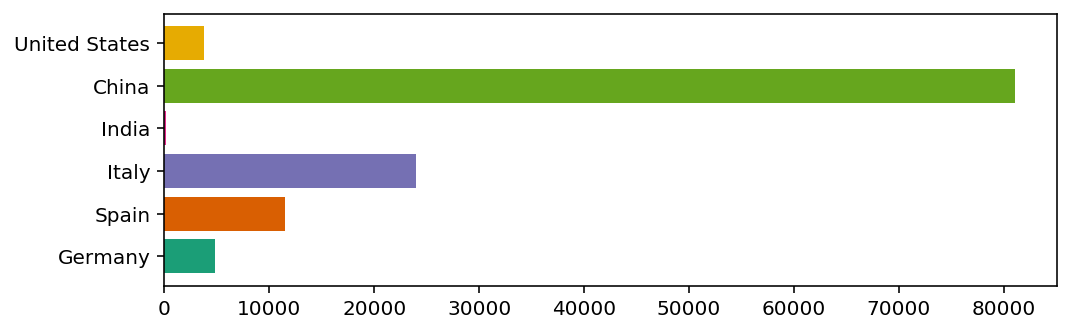

In [5]:
import matplotlib.pyplot as plt
plt.rcParams['animation.ffmpeg_path'] = '/usr/local/bin/ffmpeg'
fig, ax = plt.subplots(figsize=(8, 2.5), dpi=144)
colors = plt.cm.Dark2(range(6))
y = s.index
width = s.values
ax.barh(y=y, width=width, color=colors);

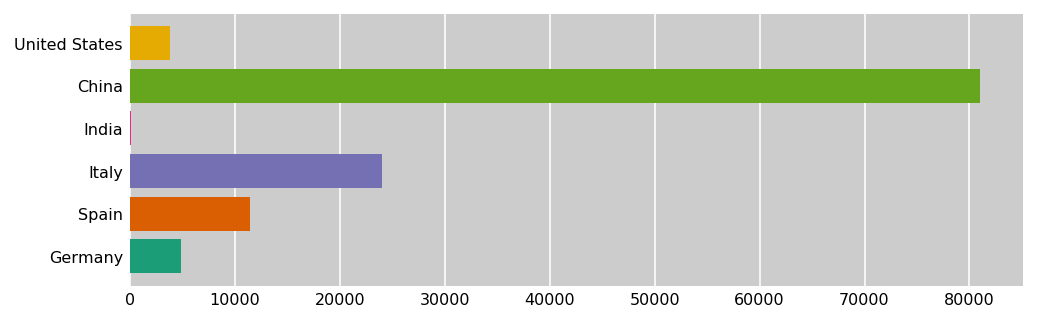

In [6]:
def nice_axes(ax):
    ax.set_facecolor('.8')
    ax.tick_params(labelsize=8, length=0)
    ax.grid(True, axis='x', color='white')
    ax.set_axisbelow(True)
    [spine.set_visible(False) for spine in ax.spines.values()]
    
nice_axes(ax)
fig

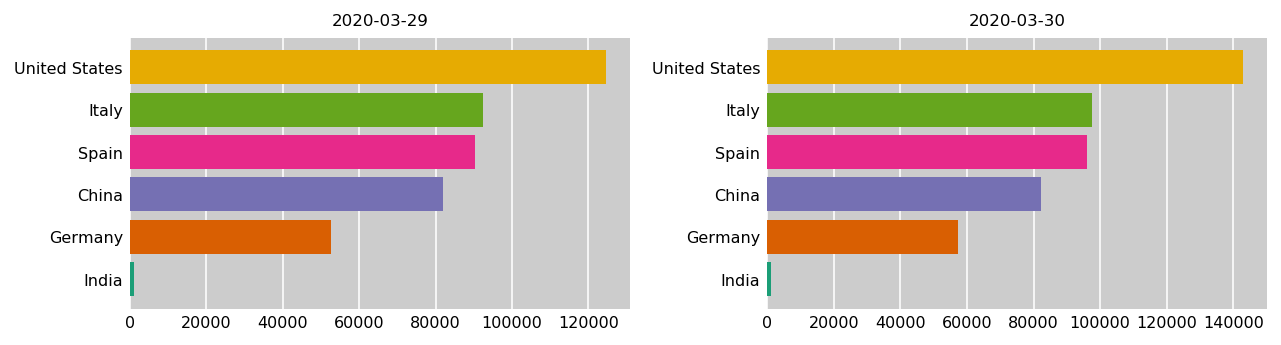

In [7]:
fig, ax_array = plt.subplots(nrows=1, ncols=2, figsize=(9, 2.5), 
                             dpi=144, tight_layout=True)
dates = ['2020-03-29', '2020-03-30']
for ax, date in zip(ax_array, dates):
    s = df.loc[date].sort_values()
    ax.barh(y=s.index, width=s.values, color=colors)
    ax.set_title(date, fontsize='smaller')
    nice_axes(ax)

In [8]:
df.loc['2020-03-29'].rank(method='first')

Germany          2.0
Spain            4.0
Italy            5.0
India            1.0
China            3.0
United States    6.0
Name: 2020-03-29 00:00:00, dtype: float64

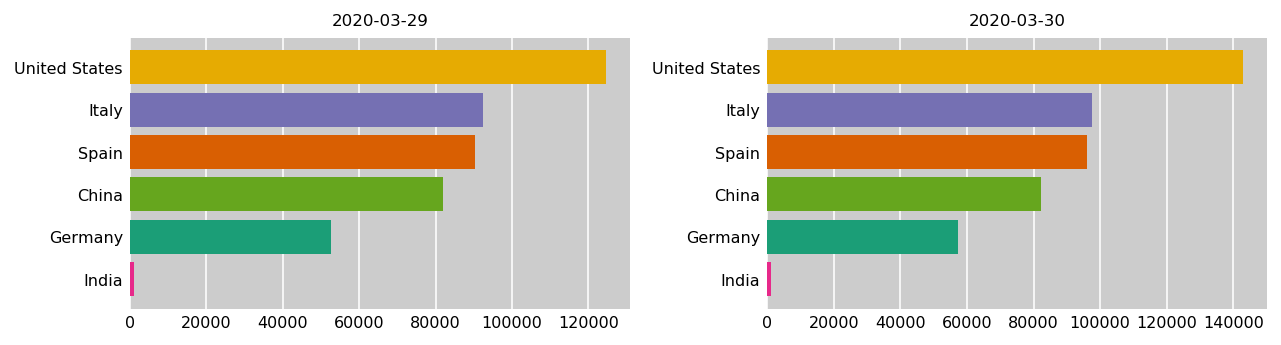

In [9]:
fig, ax_array = plt.subplots(nrows=1, ncols=2, figsize=(9, 2.5), 
                             dpi=144, tight_layout=True)
dates = ['2020-03-29', '2020-03-30']
for ax, date in zip(ax_array, dates):
    s = df.loc[date]
    y = df.loc[date].rank(method='first')
    ax.barh(y=y, width=s.values, color=colors, tick_label=s.index)
    ax.set_title(date, fontsize='smaller')
    nice_axes(ax)

In [10]:
df2 = df.loc['2020-03-29':'2020-03-31']
df2

,Germany,Spain,Italy,India,China,United States
Date,,,,,,
2020-03-29,52547,90309.0,92472,1071.0,82059,124665
2020-03-30,57298,96122.0,97689,1251.0,82157,143025
2020-03-31,61913,104267.0,101739,1397.0,82241,164620


In [11]:
df2 = df2.reset_index()
df2

,Date,Germany,Spain,Italy,India,China,United States
0,2020-03-29,52547,90309.0,92472,1071.0,82059,124665
1,2020-03-30,57298,96122.0,97689,1251.0,82157,143025
2,2020-03-31,61913,104267.0,101739,1397.0,82241,164620


In [12]:
df2.index = df2.index * 5
df2

,Date,Germany,Spain,Italy,India,China,United States
0,2020-03-29,52547,90309.0,92472,1071.0,82059,124665
5,2020-03-30,57298,96122.0,97689,1251.0,82157,143025
10,2020-03-31,61913,104267.0,101739,1397.0,82241,164620


In [13]:
last_idx = df2.index[-1] + 1
df_expanded = df2.reindex(range(last_idx))
df_expanded

,Date,Germany,Spain,Italy,India,China,United States
0,2020-03-29,52547.0,90309.0,92472.0,1071.0,82059.0,124665.0
1,NaT,NaN,NaN,NaN,NaN,NaN,NaN
2,NaT,NaN,NaN,NaN,NaN,NaN,NaN
3,NaT,NaN,NaN,NaN,NaN,NaN,NaN
4,NaT,NaN,NaN,NaN,NaN,NaN,NaN
5,2020-03-30,57298.0,96122.0,97689.0,1251.0,82157.0,143025.0
6,NaT,NaN,NaN,NaN,NaN,NaN,NaN
7,NaT,NaN,NaN,NaN,NaN,NaN,NaN
8,NaT,NaN,NaN,NaN,NaN,NaN,NaN
9,NaT,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
df_expanded['Date'] = df_expanded['Date'].fillna(method='ffill')
df_expanded = df_expanded.set_index('Date')
df_expanded

,Germany,Spain,Italy,India,China,United States
Date,,,,,,
2020-03-29,52547.0,90309.0,92472.0,1071.0,82059.0,124665.0
2020-03-29,NaN,NaN,NaN,NaN,NaN,NaN
2020-03-29,NaN,NaN,NaN,NaN,NaN,NaN
2020-03-29,NaN,NaN,NaN,NaN,NaN,NaN
2020-03-29,NaN,NaN,NaN,NaN,NaN,NaN
2020-03-30,57298.0,96122.0,97689.0,1251.0,82157.0,143025.0
2020-03-30,NaN,NaN,NaN,NaN,NaN,NaN
2020-03-30,NaN,NaN,NaN,NaN,NaN,NaN
2020-03-30,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
df_rank_expanded = df_expanded.rank(axis=1, method='first')
df_rank_expanded

,Germany,Spain,Italy,India,China,United States
Date,,,,,,
2020-03-29,2.0,4.0,5.0,1.0,3.0,6.0
2020-03-29,NaN,NaN,NaN,NaN,NaN,NaN
2020-03-29,NaN,NaN,NaN,NaN,NaN,NaN
2020-03-29,NaN,NaN,NaN,NaN,NaN,NaN
2020-03-29,NaN,NaN,NaN,NaN,NaN,NaN
2020-03-30,2.0,4.0,5.0,1.0,3.0,6.0
2020-03-30,NaN,NaN,NaN,NaN,NaN,NaN
2020-03-30,NaN,NaN,NaN,NaN,NaN,NaN
2020-03-30,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
df_expanded = df_expanded.interpolate()
df_expanded

,Germany,Spain,Italy,India,China,United States
Date,,,,,,
2020-03-29,52547.0,90309.0,92472.0,1071.0,82059.0,124665.0
2020-03-29,53497.2,91471.6,93515.4,1107.0,82078.6,128337.0
2020-03-29,54447.4,92634.2,94558.8,1143.0,82098.2,132009.0
2020-03-29,55397.6,93796.8,95602.2,1179.0,82117.8,135681.0
2020-03-29,56347.8,94959.4,96645.6,1215.0,82137.4,139353.0
2020-03-30,57298.0,96122.0,97689.0,1251.0,82157.0,143025.0
2020-03-30,58221.0,97751.0,98499.0,1280.2,82173.8,147344.0
2020-03-30,59144.0,99380.0,99309.0,1309.4,82190.6,151663.0
2020-03-30,60067.0,101009.0,100119.0,1338.6,82207.4,155982.0


In [17]:
df_rank_expanded = df_rank_expanded.interpolate()
df_rank_expanded

,Germany,Spain,Italy,India,China,United States
Date,,,,,,
2020-03-29,2.0,4.0,5.0,1.0,3.0,6.0
2020-03-29,2.0,4.0,5.0,1.0,3.0,6.0
2020-03-29,2.0,4.0,5.0,1.0,3.0,6.0
2020-03-29,2.0,4.0,5.0,1.0,3.0,6.0
2020-03-29,2.0,4.0,5.0,1.0,3.0,6.0
2020-03-30,2.0,4.0,5.0,1.0,3.0,6.0
2020-03-30,2.0,4.2,4.8,1.0,3.0,6.0
2020-03-30,2.0,4.4,4.6,1.0,3.0,6.0
2020-03-30,2.0,4.6,4.4,1.0,3.0,6.0


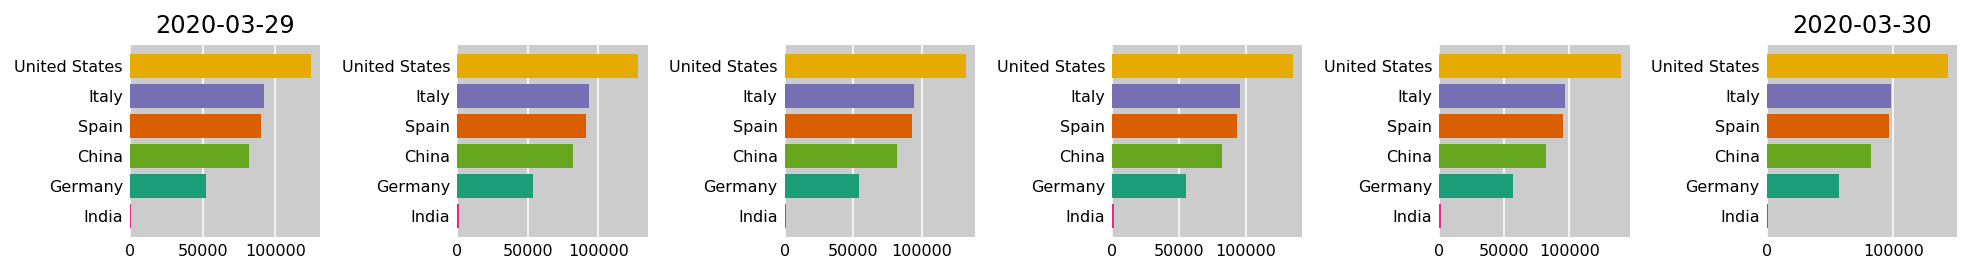

In [18]:
fig, ax_array = plt.subplots(nrows=1, ncols=6, figsize=(14, 2), 
                             dpi=144, tight_layout=True)
labels = df_expanded.columns
for i, ax in enumerate(ax_array.flatten()):
    y = df_rank_expanded.iloc[i]
    width = df_expanded.iloc[i]
    ax.barh(y=y, width=width, color=colors, tick_label=labels)
    nice_axes(ax)
ax_array[0].set_title('2020-03-29')
ax_array[-1].set_title('2020-03-30');

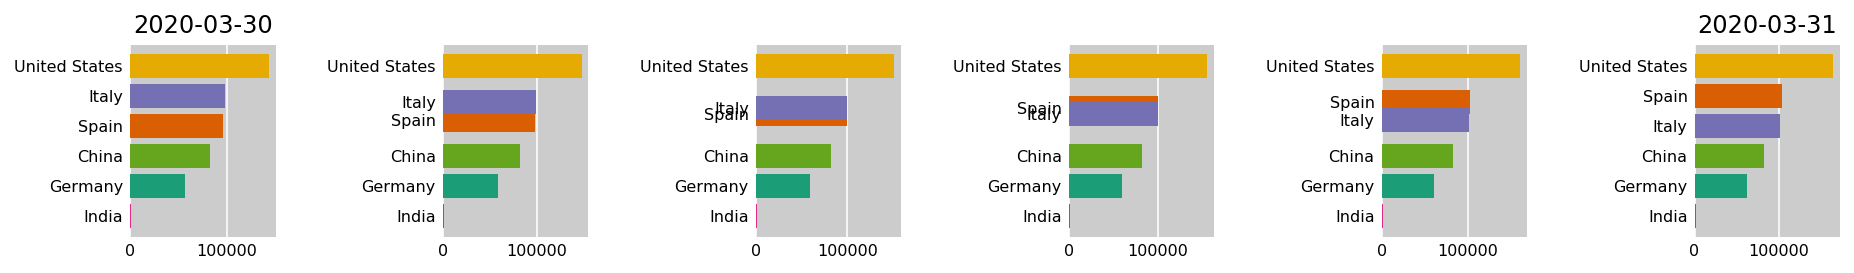

In [19]:
fig, ax_array = plt.subplots(nrows=1, ncols=6, figsize=(13, 2), 
                             dpi=144, tight_layout=True)
labels = df_expanded.columns
for i, ax in enumerate(ax_array.flatten(), start=5):
    y = df_rank_expanded.iloc[i]
    width = df_expanded.iloc[i]
    ax.barh(y=y, width=width, color=colors, tick_label=labels)
    nice_axes(ax)
ax_array[0].set_title('2020-03-30')
ax_array[-1].set_title('2020-03-31');

In [20]:
def prepare_data(df, steps=5):
    df = df.reset_index()
    df.index = df.index * steps
    last_idx = df.index[-1] + 1
    df_expanded = df.reindex(range(last_idx))
    df_expanded['Date'] = df_expanded['Date'].fillna(method='ffill')
    df_expanded = df_expanded.set_index('Date')
    df_rank_expanded = df_expanded.rank(axis=1, method='first')
    df_expanded = df_expanded.interpolate()
    df_rank_expanded = df_rank_expanded.interpolate()
    return df_expanded, df_rank_expanded

df_expanded, df_rank_expanded = prepare_data(df)
df_expanded.head()

,Germany,Spain,Italy,India,China,United States
Date,,,,,,
2019-12-31,0.0,0.0,0.0,0.0,27.0,0.0
2019-12-31,0.0,0.0,0.0,0.0,27.0,0.0
2019-12-31,0.0,0.0,0.0,0.0,27.0,0.0
2019-12-31,0.0,0.0,0.0,0.0,27.0,0.0
2019-12-31,0.0,0.0,0.0,0.0,27.0,0.0


In [21]:
df_rank_expanded.head()

,Germany,Spain,Italy,India,China,United States
Date,,,,,,
2019-12-31,1.0,2.0,3.0,4.0,6.0,5.0
2019-12-31,1.0,2.0,3.0,4.0,6.0,5.0
2019-12-31,1.0,2.0,3.0,4.0,6.0,5.0
2019-12-31,1.0,2.0,3.0,4.0,6.0,5.0
2019-12-31,1.0,2.0,3.0,4.0,6.0,5.0


In [24]:
from matplotlib.animation import FuncAnimation

def init():
    ax.clear()
    nice_axes(ax)
    ax.set_ylim(.2, 6.8)

def update(i):
    for bar in ax.containers:
        bar.remove()
    y = df_rank_expanded.iloc[i]
    width = df_expanded.iloc[i]
    ax.barh(y=y, width=width, color=colors, tick_label=labels)
    date_str = df_expanded.index[i].strftime('%B %-d, %Y')
    ax.set_title(f'COVID-19 Deaths by Country - {date_str}', fontsize='smaller')
    
fig = plt.Figure(figsize=(4, 2.5), dpi=144)
ax = fig.add_subplot()
anim = FuncAnimation(fig=fig, func=update, init_func=init, frames=len(df_expanded), 
                     interval=100, repeat=False)

In [28]:
conda install -c menpo ffmpeg

Note: you may need to restart the kernel to use updated packages.
Solving environment: ...working... done

## Package Plan ##


  environment location: C:\Users\arshsuri\AppData\Local\Continuum\anaconda3

  added / updated specs:
    - ffmpeg


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ffmpeg-2.7.0               |                0        40.6 MB  menpo
    ------------------------------------------------------------
                                           Total:        40.6 MB

The following NEW packages will be INSTALLED:

  ffmpeg             menpo/win-64::ffmpeg-2.7.0-0




ffmpeg-2.7.0         | 40.6 MB   |            |   0% 
ffmpeg-2.7.0         | 40.6 MB   |            |   0% 
ffmpeg-2.7.0         | 40.6 MB   |            |   0% 
ffmpeg-2.7.0         | 40.6 MB   |            |   0% 
ffmpeg-2.7.0         | 40.6 MB   |            |   0% 
ffmpeg-2.7.0         | 40.6 MB   |   

In [31]:
import ffmpeg

ModuleNotFoundError: No module named 'ffmpeg'